## Chapter 12

### Fisher and likelihood

### Fisher on likelihood

Fisher one was one of the architects of the classical school, in that he found a lot of the tests that get used in practice, while Neyman-Pearson developed the theory of type I and type II errors. 

Fisher himself was an advocate of the likelihood axiom, in his late 1956 book *Statistical methods and scientific inference*  ({cite}`Fisher1956-lw`, reprinted in third edition in {cite}`Fisher1990-dp`):

> The likelihood supplies a natural order of preference among the possibilities under consideration. [...] the whole information provided by the sample, within the framework of a given sampling method, is comprised in the likelihood, as a function known for all values of the parameter ({cite}`Fisher1990-dp` p. 73).

### Fisher on composite hypotheses

However, he saw one of its key differences with probability:

> [...] but it is a quantity of a different kind than probability, and does not obey the laws of probability. Whereas such a phrase as "the probability of A or B" has a simple meaning, where A and B are mutually exclusive hypotheses, the phrase "the likelihood of A or B" is more parallel with "the income of Peter or Paul" -- you cannot know what it is until you know which is meant ({cite}`Fisher1956-lw`, {cite}`Fisher1990-dp` p. 72).

Fisher is pointing out that $p(x\mid \theta_1 \vee \theta_2)$ is ostensibly ill-defined. This is indeed true if one is merely regarding this as shorthand for something like $p_{\theta_1\vee \theta_2}(x)$: for, the parameter space $\Theta$ might not consist of pdfs which are closed under some operation of union.

## Forester and Sober on likelihood

### Reasons for likelihood

The beginning of the Forester-Sober paper ({cite}`Forster2010-on`) is a useful commentary on the arguments in Chapter 1 of Royall ({cite}`Royall2017-gc`). While they are sympathetic to likelihood and think that it has a place in the canon of statistical inference, they usefully point that there are some lacunas in the defense of likelihood:

1. In defending likelihood against the Bayesian approach, we are not given a positive argument as much as told the Bayesians face a certain kind of problem (dependency on the prior) in a way that the likelihood approach does not.

> why think that likelihood describes what the evidence tells you about [the hypotheses]? ({cite}`Forster2010-on` p. 154)

2. We are not given lots of alternative measures to the likelihood ratio, and to the extent that the argument goes through not positive argument but examination of cases and their agreement with intuition, one might worry that alternatives have been neglected ({cite}`Forster2010-on` p. 154).

### Likelihood and simplicity

Consider a choice between $\theta_{simple}$ and $\theta_{complex}$, based on observed data $x$. As their names suggest, the two hypotheses are simple and complex.

It seems plausible that the complexity of the complex hypothesis could lead it to "fit" the data really well, to the extent that $p(x\mid \theta_{complex})$ is very high, almost close to one. For example, one can imagine the problem of finding a curve that fits a few points: the more complex the curve, the easier it will be for to fit those points or something close to them. 

In this case, likelihood would suggest that we prefer $\theta_{complex}$ to $\theta_{simple}$.

But "scientitists don't take this as a reason to conclude that the data always favor" $\theta_{complex}$ over $\theta_{simple}$ ({cite}`Forster2010-on` p. 159).



### Royall on contrasts to the classical school

### The experiments

Consider the following three experiments, each of which is geared towards inferring on the basis of the observed values of the random variable the bias $\theta$ of a coin flipped independently a large number of times: 

- $X$ counts the number of heads in 20 independent tosses of a coin. We observe $X=6$.

- $Y$ counts whether or not there are 6 heads in 20 independent independent tosses of a coin. We observe that $Y=1$, i.e. that there are 6 heads.

- $Z$ counts the number of tosses needed until one gets 6 heads. We observe $Z=20$.

Royall's question is: 

Does the evidence that we acquire each time support a hypothesis (when contrasted with another) any more or less between the three experiments $X,Y,Z$? 

### The distributions of the three random variables

Where $\theta$ records possible options for the bias of the coin, we have:

- $X\sim \mathrm{Binom}(20,\theta)$

- $Y\sim \mathrm{Bern}(p_{\theta}(6))$, where $p_{\theta}$ is the pdf of $\mathrm{Binom}(20,\theta)$.

- $Z\sim \mathrm{NegBinom}(6,\theta)$, where this refers to the negative binomial distribution.

In [4]:
# parameters of the binomial distribution

n1 = 20   # set value of n, number of trials
p = .5 # set value of p, probability of trial for X


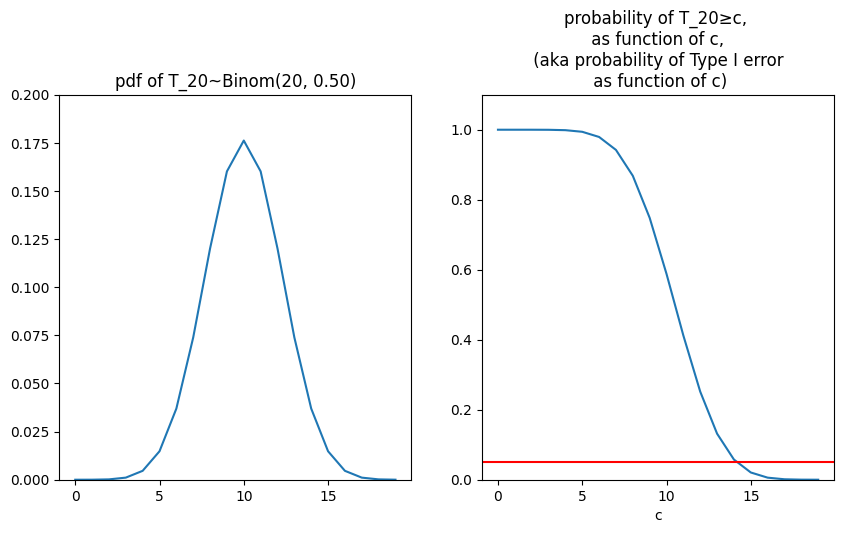

In [5]:
import numpy as np                # load numpy package
import matplotlib.pyplot as plt   # load pyplot package
from scipy.stats import binom     # load binomial distribution

v = np.arange(0, n1) # values for x-axis
Xpdf = binom.pmf(v, n1, p) # pdf for X
Xcdf = binom.cdf(v, n1, p) # cdf for X
Xccdf = 1-Xcdf               # ccdf for X

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

 # Plot the PDF on the first subplot
axs[0].plot(v, Xpdf)
axs[0].set_ylim(0, .2)
axs[0].set_title('pdf of T_%i~Binom(%i, %1.2f)' % (n1,n1,p))

# Plot the CCDF on the second subplot
axs[1].plot(v, Xpdf+Xccdf)
axs[1].set_ylim(0, 1.1)
axs[1].set_title('probability of T_%i≥c, \n as function of c, \n (aka probability of Type I error \n as function of c)' % n1)
axs[1].set_xlabel('c')  # Add x-axis label
axs[1].axhline(y=.05, color='r', label='.05')

plt.show()